# COMP534 Lab 3 Exercise

The [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a dataset of morphologic variation of Iris flowers. This dataset has 150 samples **equally** divided into 3 classes: Iris `setosa`, Iris `virginica`, and Iris `versicolor`. Each sample is composed of 4 features: petal length and width, and sepal length and width.

## 1. Data

Load the Iris dataset using the [SKlearn library function](https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

This function returns a dictionary with the following attributes:
- .data: the actual samples (shape 150x4)
- .target: the classes of the samples (shape 150 with the 3 classes encoded as 0, 1, or 2)
- .target_names: the name of the classes, i.e., `setosa`, `versicolor`, `virginica`

In [56]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print(iris.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)


## 2. Dimensionality Reduction

Since this dataset has 4 features, it is NOT possible to plot/visualize it, as we can only do that with 2 or 3 dimensional data.

Therefore, try using dimensionality reduction algorithms (such as [PCA](
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), [TNSE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) to reduce the features to 2 or 3 dimensions and then plot them.

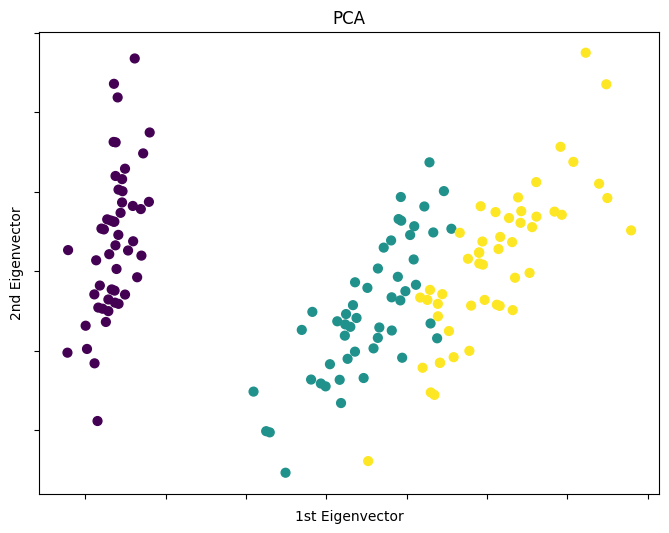

In [57]:
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=iris.target,
    s=40,
)

ax.set_title("PCA")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])

plt.show()

## 3. Clustering

Let's now explore various clustering approaches.

Using the projected data, experiment with different [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html). Remember to tune your parameters. For K-Means, you can use the Elbow Method to determine the optimal number of clusters (it should be 3, since we have 3 classes, but is it?). For the other methods, you can use the [Silhoute Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) seen in the lectures to evaluate the quality of the generated clustering. Alternatively, you can plot the generated clusters.

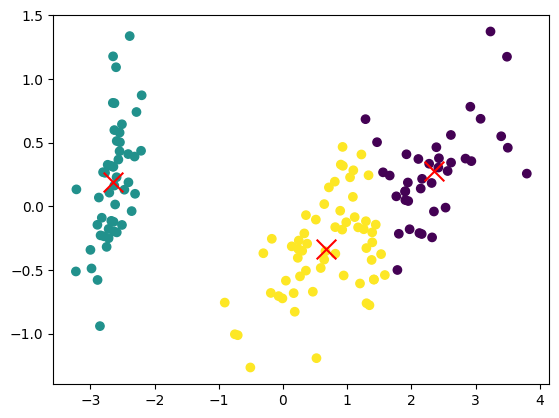

In [58]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)
labels = kmeans.labels_

# Plot results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.show()

In [59]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
silhouette = silhouette_score(X_reduced, labels)
print(f"Inertia: {inertia}, Silhouette Score: {silhouette}")

Inertia: 63.81994202200123, Silhouette Score: 0.5976764219547994


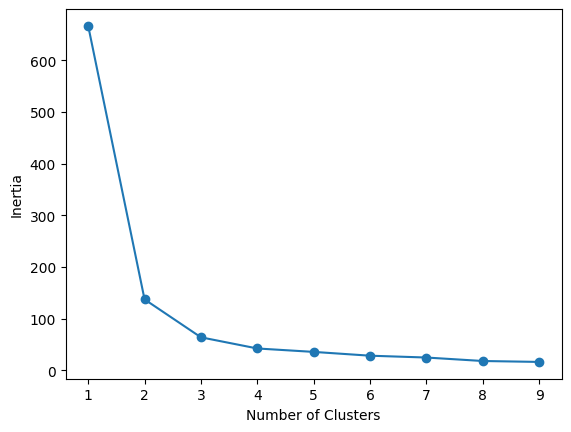

In [60]:
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()